In [1]:
import random
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

random_state = random.randint(0, 500)
X, y = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=random_state, flip_y=5.5)

In [2]:
X

array([[ 1.49332959,  1.42723097],
       [-0.5448109 , -1.02151746],
       [-0.35225083,  0.25709414],
       [-1.67452442, -0.40857984],
       [-1.21810599, -0.77491478],
       [-0.64113112,  0.1082211 ],
       [-2.17998198,  2.04214942],
       [-1.04158373, -0.91521011],
       [ 1.36577794, -0.50162361],
       [ 0.33823115,  0.46491809],
       [-1.24327476,  0.44752609],
       [ 0.45311684,  0.58838763],
       [-1.45802269,  1.22942369],
       [-1.7227273 ,  0.3265269 ],
       [ 1.28926379,  0.07669887],
       [ 2.3445915 , -2.63034178],
       [ 0.10586251,  0.56922555],
       [ 0.26811786, -2.0557334 ],
       [ 1.3826682 , -0.61280265],
       [ 1.600096  ,  1.32349691],
       [ 1.16615891, -0.45163084],
       [-1.34656304, -0.32748757],
       [-1.02393215,  0.66114128],
       [ 0.16099902,  1.26059748],
       [-2.66047221,  2.35631084],
       [-2.24788443,  0.20001706],
       [-1.22988492, -2.08977826],
       [-1.40259608,  0.26822324],
       [ 0.41277742,

In [3]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0])

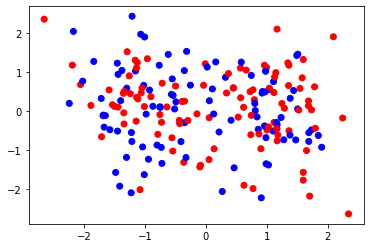

In [4]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [5]:
# Divide the dataset into training and test samples in the ratio 70/30.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [6]:
# Create a linear classification model using the L2 regularizer and train it on the training set.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l2', random_state=random_state)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=431)

In [7]:
# Get the predictions of the trained model for the test set objects. Generate a matrix of responses in the test sample and a matrix of values predicted by the model. Assess classification quality using the accuracy metric.
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[24,  6],
       [19, 11]], dtype=int64)

In [8]:
accuracy_score(y_test, y_pred)

0.5833333333333334

In [9]:
# Create various linear classification models using L2 and L1 regularizers and various loss functions using SGDClassifier. Train the models built on the training set. Evaluate the quality of all classifiers received.
from sklearn.linear_model import SGDClassifier

classifiers = [
    LogisticRegression(penalty='l2', random_state=random_state),
    SGDClassifier(loss='log', penalty='l2', random_state=random_state),
    SGDClassifier(loss='hinge', penalty='l2', random_state=random_state),
    SGDClassifier(loss='modified_huber', penalty='l2', random_state=random_state),
    SGDClassifier(loss='perceptron', penalty='l2', random_state=random_state),
    SGDClassifier(loss='squared_hinge', penalty='l2', random_state=random_state),
    SGDClassifier(loss='squared_error', penalty='l2', random_state=random_state),
    SGDClassifier(loss='hinge', penalty='l1', random_state=random_state),
    SGDClassifier(loss='modified_huber', penalty='l1', random_state=random_state),
    SGDClassifier(loss='perceptron', penalty='l1', random_state=random_state),
    SGDClassifier(loss='squared_hinge', penalty='l1', random_state=random_state),
    SGDClassifier(loss='squared_error', penalty='l1', random_state=random_state)
]


def train_classifier(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)


def predict_labels(classifier, features, target):
    y_pred = classifier.predict(features)
    return accuracy_score(target, y_pred)


def train_predict(classifier, X_train, y_train, X_test, y_test):
    train_classifier(classifier, X_train, y_train)
    print('{}: {}'.format(classifier.__class__.__name__, round(predict_labels(classifier, X_test, y_test), 2)))
    return predict_labels(classifier, X_test, y_test)


for classifier in classifiers:
    train_predict(classifier, X_train, y_train, X_test, y_test)

LogisticRegression: 0.58
SGDClassifier: 0.52
SGDClassifier: 0.5
SGDClassifier: 0.58
SGDClassifier: 0.48
SGDClassifier: 0.47
SGDClassifier: 0.52
SGDClassifier: 0.5
SGDClassifier: 0.62
SGDClassifier: 0.5
SGDClassifier: 0.45
SGDClassifier: 0.5


In [10]:
# via cross validation (use the precision metric, the number of blocks is 10). For each model, generate a series of quality scores, a final (mean) score, and a standard deviation.
from sklearn.model_selection import cross_val_score


def train_predict(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)


def train_predict_cv(classifier, X, y, cv=10):
    scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    return scores


def print_scores(classifier, scores):
    print(classifier)
    print()
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    print()


for classifier in classifiers:
    scores = train_predict_cv(classifier, X_train, y_train, cv=10)
    print_scores(classifier.__class__.__name__, scores)

LogisticRegression

Scores: [0.57142857 0.28571429 0.5        0.5        0.42857143 0.42857143
 0.5        0.5        0.21428571 0.5       ]
Mean: 0.4428571428571429
Standard deviation: 0.10497813183356478

SGDClassifier

Scores: [0.5        0.42857143 0.5        0.57142857 0.5        0.57142857
 0.28571429 0.35714286 0.71428571 0.57142857]
Mean: 0.5
Standard deviation: 0.11517511068997928

SGDClassifier

Scores: [0.5        0.35714286 0.5        0.5        0.5        0.57142857
 0.35714286 0.5        0.35714286 0.57142857]
Mean: 0.47142857142857136
Standard deviation: 0.07953949089757173

SGDClassifier

Scores: [0.5        0.64285714 0.5        0.5        0.5        0.42857143
 0.28571429 0.57142857 0.21428571 0.5       ]
Mean: 0.46428571428571425
Standard deviation: 0.12058530725810096

SGDClassifier

Scores: [0.35714286 0.71428571 0.64285714 0.5        0.64285714 0.35714286
 0.14285714 0.5        0.71428571 0.5       ]
Mean: 0.5071428571428571
Standard deviation: 0.17335230142159422